In [106]:
import praw
from praw.models import MoreComments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import stylecloud
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [2]:
reddit = praw.Reddit(client_id='Uqa0qPvYrRATm6WB2yy6vw', client_secret='ExLLWnJZrEJ5XrSdU9GQ074YOoOg5A', user_agent='sentiment')

In [3]:
def get_whole_thread(submission):
    # d = {}
    comments = []
    for top_level_comment in submission.comments:
        # print("COMMENT:")
        # print(top_level_comment.body)
        # d[top_level_comment.body] = []
        comments.append(top_level_comment.body)
        replies = []
        replies.extend(top_level_comment.replies)
        while replies:
            reply = replies.pop(0)
            if isinstance(reply, MoreComments):
                continue
            # print("    SUBCOMMENT:")
            # print(reply.body)
            # d[top_level_comment.body].append(reply.body)
            comments.append(reply.body)
            # print("________")
            replies = list(reply.replies) + replies
    return comments

In [4]:
subreddit = reddit.subreddit("SGExams")
cnt = 0
posts = []
print("start")
for submission in subreddit.search("smu cs"):
    post = []
    post.append(submission.title)
    post.append(submission.selftext)
    comments = get_whole_thread(submission)
    post.append(comments)
    posts.append(post)

print('end')

start
end


In [107]:
df = pd.DataFrame(posts,columns=['title', 'body', 'comments'])
# print(df)
# df.to_csv("reddit_sg_exams.csv", sep='\t')
df.head()

title  \
0  [uni] SMU CS discovery day   
1      [Uni] SMU cs or NUS cs   
2          [uni] SMU CS vs IS   
3   [UNI] How is SMU CS like?   
4      [Uni] SMU CS vs NTU CS   

                                                body  \
0  got an acceptance email tdy for SMU CS saying ...   
1  \n\nHello, i‚Äôm looking to apply for my uni cou...   
2  hi there, i just wanted to ask any students in...   
3  Got rejected by NTU and NUS... I have attended...   
4  Hey, anyone able to shed some light on SMU Com...   

                                            comments  
0  [wat ur rp?, 82.5, I was equally as surprised ...  
1  [Tbh and no offense to OP, I keep seeing these...  
2  [>hey ! current smu cs student, imo the resour...  
3  [I would like to know too I‚Äôm thinking of join...  
4  [Im unable to comment on SMU CS but I'm able t...

In [108]:
#Show the titles that contain NTU, CS, SMU and not transfer (transfer thread not relevant to outreach)
only_ntu = df[df['title'].str.contains('NTU')]
qn_content =""
for line in only_ntu['title']:
    if 'ntu' in line.lower() and 'cs' in line.lower() and 'smu' in line.lower() and 'transfer' not in line.lower(): 
        qn_content += line.lower() + ' '    
        print(line)

[Uni] SMU CS vs NTU CS
[A levels] NTU CS /NTU CE and SMU IS/SMU CS
[Uni] NTU business and computing and SMU CS+BIZ
[Uni] SMU CS or NTU CE
[A levels] SMU IS vs SIT CS vs NTU CE vs SUTD ISTD
[Uni] What are the job prospects of a biz degree? Should I study biz at NUS or CS at NTU/SMU?
[Uni] I need some help in choosing uni course. NTU or SMU for CS? seniors please give me your input!!


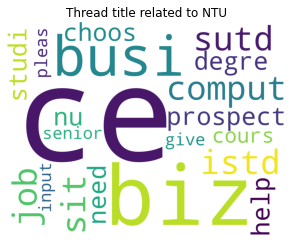

In [109]:
#Cloud word for titles that contain NTU, SMU CS
stop_words = stopwords.words('english')
stop_words.extend(['ntu', 'uni', 'smu', 'cs', 'vs', 'level', 'levels'])

qn_content = ''
for line in df['title']:
    if 'ntu' in line.lower() and 'cs' in line.lower() and 'smu' in line.lower() and 'transfer' not in line.lower():
        qn_content += line.lower() + ' '    
        #print(line)

# Tokenize Words
tokenizer = RegexpTokenizer(r'\w+')
words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words

# Remove stop words
words_filtered = []
for w in words_content:
    if w not in stop_words:
        words_filtered.append(w)

# Porter Stemmer
porter_stemmer = PorterStemmer()

words_stemmed = []
for w in words_filtered:
    words_stemmed.append(porter_stemmer.stem(w))

# WordCloud
words_joined = " ".join([w for w in words_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                     width=1800,
                     height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Thread title related to NTU')
plt.show()

In [110]:
only_ntu = df[df['title'].str.contains('NTU')]
only_ntu.head()

title  \
4                              [Uni] SMU CS vs NTU CS   
5         [A levels] NTU CS /NTU CE and SMU IS/SMU CS   
12    [Uni] NTU business and computing and SMU CS+BIZ   
14                             [Uni] SMU CS or NTU CE   
19  [UNI] NUS CS VS NTU CN YANG SCHOLARS PROGRAMME...   

                                                 body  \
4   Hey, anyone able to shed some light on SMU Com...   
5   So I got 75rp and can't go to NTU/SMU CS so I ...   
12  Hi all would need some advice on these choices...   
14  I just received admissions from these two Univ...   
19   Hi! I would like to know whether I should cho...   

                                             comments  
4   [Im unable to comment on SMU CS but I'm able t...  
5   [Go to NTU CE or SIT UOG if you really want to...  
12  [[deleted], I havent seen anyone below 80, I h...  
14                      [[deleted], Care to explain?]  
19  [go cnyang if you want to do research. If unsu...

In [111]:
# original stopwords
def original_stopwords():
    return stopwords.words('english')

In [112]:
def extract_text(df):
    for(columnName, columnData) in df.iteritems():
        qn_content = []
        for line in df[columnName]:
            if len(line.strip()) > 0: # Eliminates empty answers
                qn_content.append(line)
    return qn_content

In [113]:
# Helper Function for Tokenisation of text content, returns a list of word or words depending on ngrams defined
import string

def token_fn(sentence_list, n, stop_words_custom):
    output = []
    output2 = []
    for line in sentence_list:
        #remove punctuations
        new_string = line.translate(str.maketrans('', '', string.punctuation))
        new_string = new_string.replace('‚Äú', '')
        new_string = new_string.replace('‚Äù', '')
        
        x = new_string.split()
        
        for word in x:
            if word not in stop_words_custom:
                #print(word)
                output.append(word)

        sentence = ""
        for word in output:
            sentence += word + " "
        
        token = word_tokenize(sentence)
        gram = list(ngrams(token, n))

        if n == 1:
            for content in gram:
                for word in content:
                    output2.append(word)  
        else:
            for content in gram:
                link = ''
                for word in content:
                    link += word + '_'
                link = link[:-1]
                output2.append(link)
                
    return output2

def wc_fn(word_list, title, no_word_max):
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', max_words = no_word_max, 
                             max_font_size = 1000,
                             width=3000,
                             height=2000).generate(words_joined)
    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

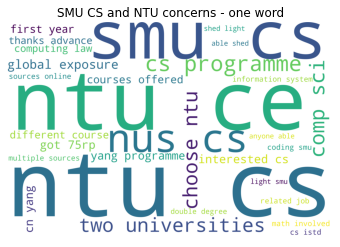

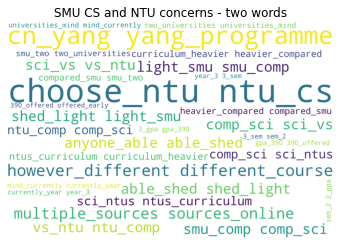

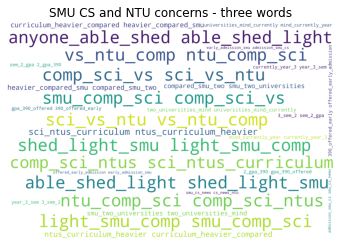

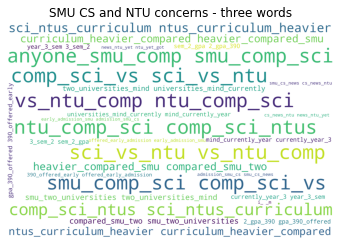

In [114]:
# # Top commmon body for SMU & NTU

smu_ntu_body = only_ntu.iloc[:, [1]]

sw = original_stopwords()
sw.extend(['exactly','x200b' , 'boil','nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
           'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right'])

sentences = []
for sentence in smu_ntu_body["body"]:
    #sentences = []
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower():
        sentences.append(sentence.lower())
    
    
single_word = token_fn(sentences, 1, sw)
wc_fn(single_word, 'SMU CS and NTU concerns - one word', 30)

double_word = token_fn(sentences, 2, sw)
wc_fn(double_word, 'SMU CS and NTU concerns - two words', 30)

triple_word = token_fn(sentences, 3, sw)
wc_fn(triple_word, 'SMU CS and NTU concerns - three words', 30)


sw.extend(['nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
           'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right' , 'shed' , 'light' , 'able'])

triple_word = token_fn(sentences, 3, sw)
wc_fn(triple_word, 'SMU CS and NTU concerns - three words', 30)

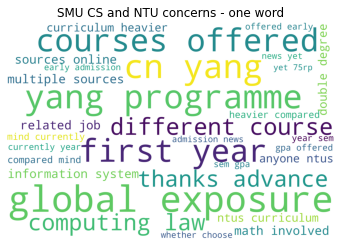

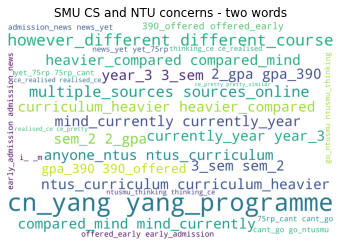

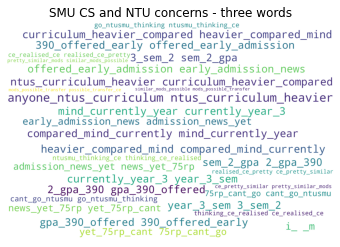

In [115]:
# # Top commmon body for SMU & NTU - deeper cleaning of words

smu_ntu_body = only_ntu.iloc[:, [1]]

sw = original_stopwords()
sw.extend(['shed', 'light', 'able', 'ntu', 'vs','got', 'universities','two','heard','cs','nus', 'smu', 'comp', 'sci','exactly','x200b' , 'boil','nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
           'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right'])

sentences = []
for sentence in smu_ntu_body["body"]:
    #sentences = []
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower():
        sentences.append(sentence.lower())
    
    
single_word = token_fn(sentences, 1, sw)
wc_fn(single_word, 'SMU CS and NTU concerns - one word', 30)

double_word = token_fn(sentences, 2, sw)
wc_fn(double_word, 'SMU CS and NTU concerns - two words', 30)

triple_word = token_fn(sentences, 3, sw)
wc_fn(triple_word, 'SMU CS and NTU concerns - three words', 30)

In [116]:
# #Total number of insights

smu_ntu_comments = only_ntu.iloc[:, [2]]

sentences = []
noOfThread = 0
totalComments = 0
for commentArray in smu_ntu_comments["comments"]:
    noOfThread += 1
    valueArray = 0
    for comment in commentArray:
        valueArray += 1
        totalComments += 1

print(noOfThread , ' no of Threads and' , totalComments , 'Comments for all Threads')
print('Average comments per thread: ' , totalComments/noOfThread)

15  no of Threads and 128 Comments for all Threads
Average comments per thread:  8.533333333333333


In [ ]:
## BIZ RELATED

In [131]:
#Finding for SMU, NTU, Biz
only_ntu = df[df['title'].str.contains('NTU')]
qn_content =""
for line in only_ntu['title']:
    if 'ntu' in line.lower() and 'biz' in line.lower() and 'smu' in line.lower() and 'transfer' not in line.lower(): 
        qn_content += line.lower() + ' '    
        print(line)

[Uni] NTU business and computing and SMU CS+BIZ
[Uni] What are the job prospects of a biz degree? Should I study biz at NUS or CS at NTU/SMU?
[Uni] Is DDP worth it? NTU DDP VS SMU BIZ


Hi all would need some advice on these choices! 

My dad has been hinting to me NTU due to its ‚Äúprestige‚Äù and wide connections it has, which i admit can be beneficial but definitely not a major dealbreaker in deciding my choice (at least for me) 

But hav heard that the teaching culture in NTU is nt tat good whereby profs are v much in to their research only, also i myself am nt rlly sure if i will be able to handle the rigorous curriculum of this programme, so would also like to ask if is it possible to drop to computing with a major/minor in business halfway through my studies? 

As for SMU, the age of the programme is a little worrying as its still young and im nt rlly sure what do employers view upon a CS programme from a business specialist school but i heard tat smu teaching is better, which i feel is more impt to me in general. However, from what i read it is harder to do well in smu cs since the cohort is v small and hence the bell curve is v high... Also from what i know f

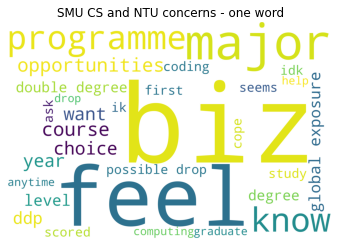

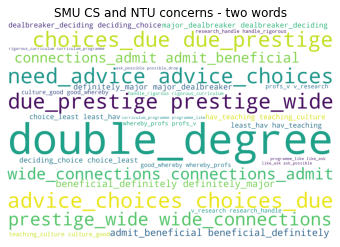

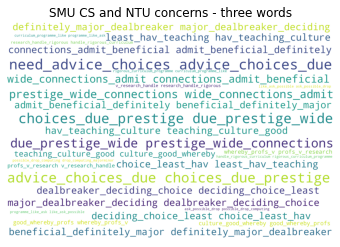

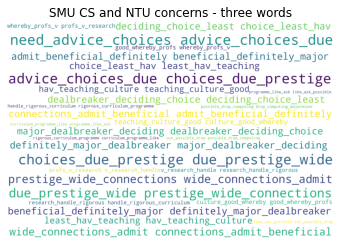

In [148]:
# # Top commmon body for SMU & NTU Biz

smu_ntu_body = only_ntu.iloc[:, [1]]
sentences = []

sw.extend(['dad', 'hinting'])

for sentence in smu_ntu_body["body"]:
    #sentences = []
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower() and 'biz' in sentence.lower():
        print(sentence)
        sentences.append(sentence.lower())
        print('--------------------------------')
    
    
single_word = token_fn(sentences, 1, sw)
wc_fn(single_word, 'SMU CS and NTU concerns - one word', 30)

double_word = token_fn(sentences, 2, sw)
wc_fn(double_word, 'SMU CS and NTU concerns - two words', 30)

triple_word = token_fn(sentences, 3, sw)
wc_fn(triple_word, 'SMU CS and NTU concerns - three words', 30)


sw.extend(['nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
           'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right' , 'shed' , 'light' , 'able'])

triple_word = token_fn(sentences, 3, sw)
wc_fn(triple_word, 'SMU CS and NTU concerns - three words', 30)

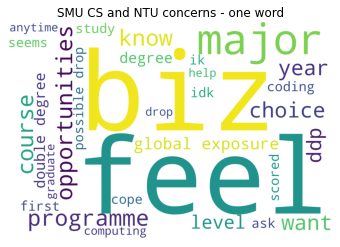

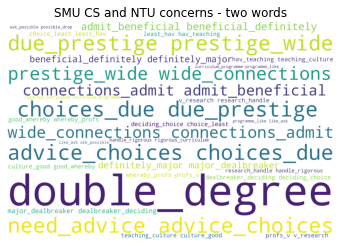

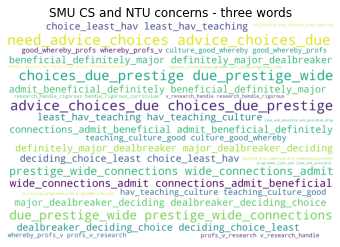

In [150]:
# # Top commmon body for SMU , NTU , BIZ , remove words

smu_ntu_body = only_ntu.iloc[:, [1]]

sentences = []
for sentence in smu_ntu_body["body"]:
    #sentences = []
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower() and 'biz' in sentence.lower():
        #print(sentence)
        sentences.append(sentence.lower())
        #print('--------------------------------')

sw.extend(['shed', 'light', 'able', 'ntu', 'vs','got', 'universities','two','heard','cs','nus', 'smu', 'comp', 'sci','exactly','x200b' , 'boil','nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
           'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right'])

single_word = token_fn(sentences, 1, sw)
wc_fn(single_word, 'SMU CS and NTU concerns - one word', 30)

double_word = token_fn(sentences, 2, sw)
wc_fn(double_word, 'SMU CS and NTU concerns - two words', 30)

triple_word = token_fn(sentences, 3, sw)
wc_fn(triple_word, 'SMU CS and NTU concerns - three words', 30)